Binary Classification using Tensorflow and Keras by developing Feed-Forward Neural Networks.

Problem: Predicting 'red wine quality'. If Quality >= 5.5, then it is 'good wine'.

---

Initial Step: Load the Data

In [1]:
import numpy as np
dataset = np.loadtxt('WineQT.csv', delimiter=',', skiprows=1, usecols=range(12))

print(dataset.shape)

(1143, 12)


In [2]:
import pandas as pd

df = pd.DataFrame(dataset)
print(df.head())


     0     1     2    3      4     5     6       7     8     9    10   11
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  5.0
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8  5.0
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8  5.0
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8  6.0
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  5.0


In [3]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df = df.drop(columns=['Id'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
dataset = df.to_numpy()

Key Questions are
1) How many rows and columns does the data have?
2) How do we load a dataset that has non-numbers?
    - To do so, you could load the dataset in a separate file, and write a script to convert non-numerical data to numerical.

---

In [8]:
print(np.unique(dataset[:, -1]))  # See unique values

[3. 4. 5. 6. 7. 8.]


Step 1: Preview the first 5 rows.

In [9]:
# Prints only floating point numbers with a 2 decimal point precision. 
np.set_printoptions(formatter={'float': lambda x: '{0:0.2f}'.format(x)})

print(dataset[0:20, :])  # Display rows 0 to 4 with all columns

[[7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 5.00]
 [7.80 0.88 0.00 2.60 0.10 25.00 67.00 1.00 3.20 0.68 9.80 5.00]
 [7.80 0.76 0.04 2.30 0.09 15.00 54.00 1.00 3.26 0.65 9.80 5.00]
 [11.20 0.28 0.56 1.90 0.07 17.00 60.00 1.00 3.16 0.58 9.80 6.00]
 [7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 5.00]
 [7.40 0.66 0.00 1.80 0.07 13.00 40.00 1.00 3.51 0.56 9.40 5.00]
 [7.90 0.60 0.06 1.60 0.07 15.00 59.00 1.00 3.30 0.46 9.40 5.00]
 [7.30 0.65 0.00 1.20 0.07 15.00 21.00 0.99 3.39 0.47 10.00 7.00]
 [7.80 0.58 0.02 2.00 0.07 9.00 18.00 1.00 3.36 0.57 9.50 7.00]
 [6.70 0.58 0.08 1.80 0.10 15.00 65.00 1.00 3.28 0.54 9.20 5.00]
 [5.60 0.61 0.00 1.60 0.09 16.00 59.00 0.99 3.58 0.52 9.90 5.00]
 [7.80 0.61 0.29 1.60 0.11 9.00 29.00 1.00 3.26 1.56 9.10 5.00]
 [8.50 0.28 0.56 1.80 0.09 35.00 103.00 1.00 3.30 0.75 10.50 7.00]
 [7.90 0.32 0.51 1.80 0.34 17.00 56.00 1.00 3.04 1.08 9.20 6.00]
 [7.60 0.39 0.31 2.30 0.08 23.00 71.00 1.00 3.52 0.65 9.70 5.00]
 [7.90 0.43 0.21 1.60 0

---

Step 2: Prepare the output

If the last column is less than 5.5, set it to 0, otherwise 1.
- (good wine = 1, bad wine = 0)

In [10]:
dataset[dataset[:, -1] < 5.5, -1] = 0
dataset[dataset[:, -1] >= 5.5, -1] = 1

print(dataset[0:20, :])

[[7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 0.00]
 [7.80 0.88 0.00 2.60 0.10 25.00 67.00 1.00 3.20 0.68 9.80 0.00]
 [7.80 0.76 0.04 2.30 0.09 15.00 54.00 1.00 3.26 0.65 9.80 0.00]
 [11.20 0.28 0.56 1.90 0.07 17.00 60.00 1.00 3.16 0.58 9.80 1.00]
 [7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 0.00]
 [7.40 0.66 0.00 1.80 0.07 13.00 40.00 1.00 3.51 0.56 9.40 0.00]
 [7.90 0.60 0.06 1.60 0.07 15.00 59.00 1.00 3.30 0.46 9.40 0.00]
 [7.30 0.65 0.00 1.20 0.07 15.00 21.00 0.99 3.39 0.47 10.00 1.00]
 [7.80 0.58 0.02 2.00 0.07 9.00 18.00 1.00 3.36 0.57 9.50 1.00]
 [6.70 0.58 0.08 1.80 0.10 15.00 65.00 1.00 3.28 0.54 9.20 0.00]
 [5.60 0.61 0.00 1.60 0.09 16.00 59.00 0.99 3.58 0.52 9.90 0.00]
 [7.80 0.61 0.29 1.60 0.11 9.00 29.00 1.00 3.26 1.56 9.10 0.00]
 [8.50 0.28 0.56 1.80 0.09 35.00 103.00 1.00 3.30 0.75 10.50 1.00]
 [7.90 0.32 0.51 1.80 0.34 17.00 56.00 1.00 3.04 1.08 9.20 1.00]
 [7.60 0.39 0.31 2.30 0.08 23.00 71.00 1.00 3.52 0.65 9.70 0.00]
 [7.90 0.43 0.21 1.60 0

We have now converted this problem into a **binary classification** problem because our output labels are now 0's and 1's. 

Proposed question: What happens if we reverse the two statements that replace wine quality with binary values?

---

Step 3: Shuffle the rows

This is done simply to get a good mix of all of the rows. It may be bad for reproducibility, but it is good for reliability. Why?
- every time you shuffle you will get completely different results, but it more or less guarantees that you won't get all 0's in the training or 1's in the testing and vice versa.

In [11]:
import random
np.random.shuffle(dataset) 

---

Step 4: Split into Training/Testing data.

All the input values that go into the model are Xtrain, and what the model needs to predict is Ytrain.

Proposed rule of thumb is an 80/20 split for training and testing.

In [12]:
index_20percent = int(0.2 * len(dataset[:, 0]))

print(index_20percent)  # 228 samples will be tested

228


In [13]:
# Take samples from start to 228 for Testing
XTEST = dataset[:index_20percent, :-1]  # Extract all columns except the last into X (indicated by :-1)
YTEST = dataset[:index_20percent, -1]   # Extract last column only into y

In [14]:
# Take samples from 228 onwards (: indicates this)
XTRAIN = dataset[index_20percent:, 0:-1]    # Extract all columns besides last
YTRAIN = dataset[index_20percent:, -1]       # Extract only last

---

Step 5: Normalize the data (if needed)

Not all datasets need normalization, but if your input column values do not necessarily sit around 0-1 then you may need to normalize

Common practice to normalize is to use standardization.

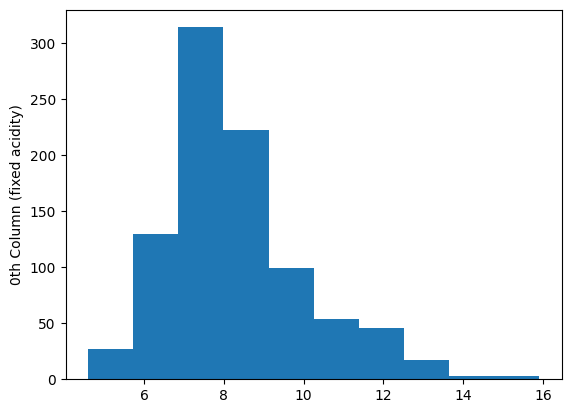

In [15]:
import matplotlib.pyplot as plt

plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

The 0th column 'fixed acidity has values ranging from roughly 3-15, and most are in the 6-10 region.

So, since these values are not in the 0-1 range we want to normalize them. 

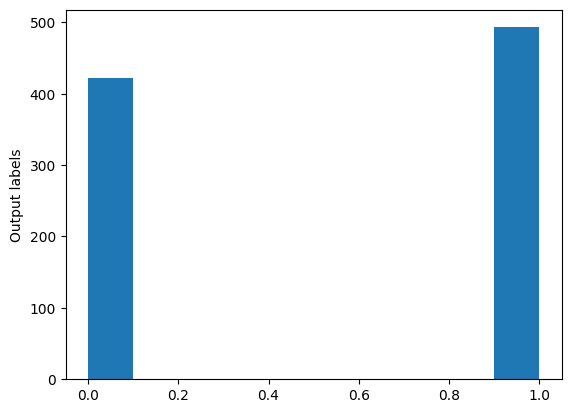

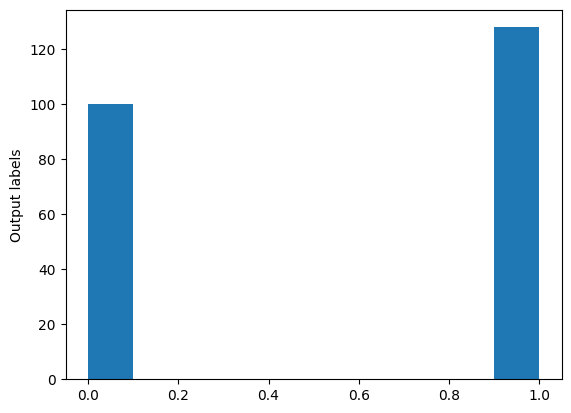

In [16]:
# Check the split of 0's and 1's in our Y-data, aka what we are predicting.

plt.hist(YTRAIN)
plt.ylabel('Output labels')
plt.show()

plt.hist(YTEST)
plt.ylabel('Output labels')
plt.show()

**Baseline Accuracy** is determined by this split, as if you have more of one value than the other the baseline accuracy will be greater than or less than 50%.

Now, lets normalize the data with standardization:

In [17]:
# You obtain the mean and standard deviation from your training data
# Then use those values to normalize your testing data

mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XTEST -= mean
XTRAIN /= std

It is important to calculate the mean and std using the training data, and subsequently use the same values for the testing data. Why?
- You only use the training data to calculate mean and std as a **True Test** of the model how it does on testing data using the parameters learned from the training set.

In [18]:
# mean and std are vectors
# So, we can see the mean and std for each feature we have

print(mean)
print(std)

[8.29 0.53 0.27 2.55 0.09 15.61 45.81 1.00 3.31 0.66 10.43]
[1.73 0.18 0.20 1.38 0.04 10.34 33.13 0.00 0.16 0.17 1.08]


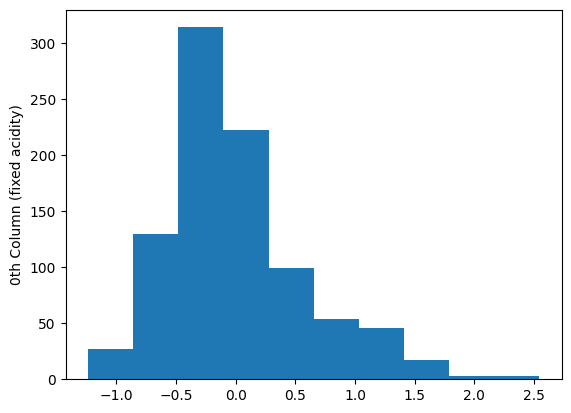

In [19]:
# Now, look at the distribution of values for the same column again. 

plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

---

Step 6: Review the Dimensions of the training & testing sets.

Also previews some of the 'input features' and 'correct labels' for the datasets.

In [20]:
# The number of rows in XTRAIN & YTRAIN must be the same.
print(XTRAIN.shape)
print(YTRAIN.shape)

(915, 11)
(915,)


In [21]:
# Same goes for the testing sets.
print(XTEST.shape)
print(YTEST.shape)

(228, 11)
(228,)


In [22]:
# Print the head (first 3) of the datasets
print(XTRAIN[0:3, ])
print(YTRAIN[0:3])
print(XTEST[0:3, ])
print(YTEST[0:3])

[[1.07 -6.88 6.26 -0.18 -3.62 -0.02 -0.02 387.58 -11.73 9.73 -0.54]
 [-1.10 15.72 -0.71 -0.50 -18.45 0.15 0.05 -896.65 17.56 -1.34 0.92]
 [0.27 -4.09 6.01 -0.39 -7.71 -0.08 -0.03 -570.24 -4.30 1.16 1.78]]
[1.00 0.00 1.00]
[[6.71 -0.32 0.17 -0.35 -0.01 -5.61 -21.81 0.00 -0.24 0.18 -1.23]
 [-1.09 -0.03 -0.09 -0.45 -0.02 -3.61 -14.81 0.00 0.21 0.06 -0.83]
 [7.31 0.15 0.49 1.15 0.01 -9.61 -2.81 0.01 -0.36 0.02 0.77]]
[1.00 1.00 1.00]


---

Step 7: Create a neural network model

We want to create a network with the following architecture:
- 8 neurons in layer 1
- 4 neurons in layer 2
- 1 neuron as the last layer

In [33]:
from tensorflow.keras.models import Sequential  # Sequential model to stack layers
from tensorflow.keras.layers import Dense       # Dense layer aka fully connected layer

# Initialize the model
model = Sequential()

# The number of inputs that each neuron receives is the number of columns in the data
model.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))

# input_dim = len(XTRAIN[0, :]) calculates the length by using the first row (0) and all columns(:)
# Necessary for first layer as each neuron needs to know how many inputs it is receiving when designing the architecture of the NN.

# All of the outputs from the 8 neurons in layer 1 become inputs to the 4 neurons in layer 2
model.add(Dense(4, activation='relu'))

# Since we are doing binary classification, we want 1 neuron in the last layer.
model.add(Dense(1, activation='sigmoid'))

c:\Users\Jorwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Why ReLU and Sigmoid?
- **ReLU (`relu`)** is used in hidden layers to introduce non-linearity. It helps the model learn complex patterns and prevents the vanishing gradient problem.
- **Sigmoid (`sigmoid`)** is used in the output layer for binary classification. It converts raw scores (logits) into probabilities between 0 and 1.
- **Logits** are the raw, unscaled outputs of a neuron before applying an activation function. They can take any real value, but we apply an activation function (like `sigmoid`) to convert them into interpretable probabilities.
- **The Vanishing Gradient Problem** happens when the learning signal (gradient) becomes too small, making earlier layers in a deep network stop learning. This is like trying to learn from feedback that gets quieter and quieter until you can’t hear it anymore. ReLU helps fix this by keeping gradients strong and allowing deeper layers to keep learning.

In [34]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

None


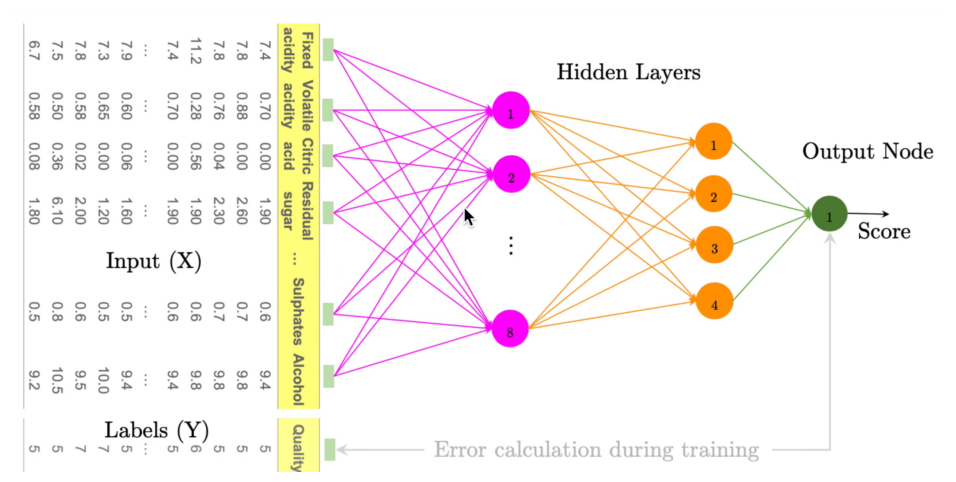

In [32]:
import matplotlib.image as mpimg

plt.figure(figsize=(15, 6))

img = mpimg.imread('NN.png')
plt.imshow(img)
plt.axis('off')
plt.show()

All the input features go into the network in a different way than the output. 

The 11 different features (columns) go into the 8 neurons in the 1st layer, from each column to every neuron. 

Those 8 neurons then feed the 4 neurons, and those 4 feed the final neuron that sits at the end. 

That final neuron, based on all the previous weights and calculations gives you an accuracy score from 0 to 1. 

If the score is bad, then the weights that connect the nodes need to be updated such that in future rounds of training the output matches closer with the input. 